# Análisis Pretest y Postest - Agencia Banco de la república

## Paso 1: Incorporar Librerías

In [17]:
###Librerías
import pandas as pd
import numpy as np
##Librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
##Librerías para test de normalidad
import statsmodels.api as sm
from scipy import stats
##Librerias para preprocesamiento
from sklearn.preprocessing import MinMaxScaler, StandardScaler
##Librerías para over y under sampling
from sklearn.utils import resample
##Warnings
import warnings
warnings.filterwarnings('ignore')
##Label Encoder
from sklearn import preprocessing

## Paso 2: Funciones para el Manejo de procesos

In [78]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext, sp):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, encoding='windows-1252', sep=sp)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')
##Importar la data
diagI = importDatos('../AnalisisProyeccionSocial/','diagnostico_inicial','.csv',';')
diagI.head()

# Función informe sobre los datos NAN
def datos_NA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" %
              (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" %
              ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" %
                  (col_name[i], dtyp[i], uniq[i], na_val[i]))

    else:
        print("Se esperaba dataframe %15s" % (type(df)))

# Funcion para revisar datos categóricos o texto
def revCategoricos(df, nomCol):
    rev = df[nomCol].value_counts()
    return rev

# Función modificar a 1 y 0 los datos categóricos

def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

# Función para variables dummies

def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data

#Función para grágicas 
def histoPlot(df, nomCol, anchoBar):
    plt.figure(figsize=(10, 8))
    sns.histplot(data=df, x=nomCol, binwidth=anchoBar, kde=True)

#Función para digrama de caja 
def boxPlot(df, varx, vary, varhue):
    sns.set_context("notebook", font_scale=1.5)
    plt.figure(figsize=(10,8))
    grped_bplot = sns.catplot(x=varx, y=vary,
                 hue=varhue,
                data=df, kind="box",
            legend=True,
            height=6, aspect=1.3)
    

#Función de barras
def barPlot(varx, vary, varhue, df, ejey, ejex):
    plt.figure(figsize=(10, 8))
    ax= sns.barplot(x=varx, y=vary, hue=varhue, data=df)
    plt.ylabel(ejey, size=14)
    plt.xlabel(ejex, size=14)
    sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

##Función multigráfica
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
vect= ['Estrato 2','Estrato 3','Estrato 1']
vectdos = ['Estrato 1','Estrato 2','Estrato 3']

def drawChart(column1, column2, texto1, texto2, explod, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    ##Grafica Matplotlib
    diagI[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=12, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    ax[0].legend(vect, loc=2, fontsize=8)
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(data=diagI, x=column1, hue=column2, ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=12, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    plt.legend(labels = vectdos, fontsize=8)
    plt.show() 

#Función Multigrafica dos
colors = ['#2ECC71','#3498DB', '#9B59B6','#E67E22', '#F1C40F']
vectres = ['Universitario','Postgrado','Secundaria (6-9)','Técnico','Media Académica']

def drawChartDos(column1, column2, texto1, texto2, explod, sizes):
    f, ax = plt.subplots(1,2, figsize=(sizes[0],sizes[1]))
    ##Grafica Matplotlib
    diagI[column2].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], 
                                             shadow=True, 
                                             explode= explod, fontsize=10, 
                                             colors=colors)
    ax[0].set_title(texto1, fontsize=14)
    ax[0].set_xlabel('', fontsize=12)
    ax[0].set_ylabel('', fontsize=12)
    
    ##Grafica seaborn '#fb8c00','#0288d1','#00e676','#ff5722','#ffeb3b','#e040fb'
    plot = sns.countplot(data=diagI, x=column1, hue=column2, ax=ax[1], palette=colors)
    for i in plot.patches:
        plot.annotate(i.get_height(),
                      (i.get_x() + i.get_width()/2, i.get_height()),
                      ha='center', va='baseline', fontsize=10, 
                     color='black', xytext=(0,1),
                     textcoords='offset points')
    ax[1].set_title(texto2,fontsize=14)
    ax[1].set_xlabel('', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)
    ax[1].tick_params(labelsize=14)
    plt.legend(labels = vectres, fontsize=8)
    plt.show() 

##Función para cambio de texto a binario
def camTextBi(df, nomCol, busqueda, camuno, camdos):
    df[nomCol] = np.where(df[nomCol] == busqueda, camuno, camdos)
    return df[nomCol]

##Función Label Encoder - Convertir multiclases a numéros
def labelE(df, nomCol):
    label_e = preprocessing.LabelEncoder()
    return label_e.fit_transform(df[nomCol])

##Función para particionar la data
def partData(df, v1,v2,v3,v4,v5,v6,v7,v8,v9,v10, v11):
    return df.loc[:,[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11]]

def partDataDos(df, v1,v2,v3,v4,v5,v6):
    return df.loc[:,[v1,v2,v3,v4,v5,v6]]

##Función para crear variables dummies
def convDummies(df, nomCol):
    dummies = pd.get_dummies(df[nomCol])
    data = pd.concat([df, dummies], axis=1)
    data.drop(columns=[nomCol], inplace=True)
    return data
    

##Test de normalidad de Shapiro-wilk
def testShapiroWilk(df):
        valoresP = []
        concepto = []
        variable = []
        for column in df:
            k2, p_value = stats.shapiro(df[column].values)
            valoresP.append(p_value)
            variable.append(column)
            if (p_value < 0.05):
                concepto.append('No es una variable Normal')
            else:
                concepto.append('Es una variable Normal')
        dfShapiro = pd.DataFrame(
            {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
        return dfShapiro

##Función para Normalizar
def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

##Correlacion pequeña
def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

##Función para gráficar correlaciones
def grafCor(matriz):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    sns.heatmap(
        matriz,
        annot     = True,
        cbar      = True,
        annot_kws = {"size": 10},
        vmin      = -1,
        vmax      = 1,
        center    = 0,
        cmap      = sns.light_palette("#0d47a1"),
        square    = True,
        ax        = ax,
        linewidth=.5
    )

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )

    ax.tick_params(labelsize = 10)


## Paso 3: Limpieza y Análisis del Pretest

In [22]:
##datos NAN
##La data se encuentra con 13 filas por 17 columnas en total 221 datos. De los cuales 13 variables con numericas tipo int64 y 4 de tipo Object.
datos_NA(diagI)

Dimensiones : 13 filas, 17 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                  edad      int64           12          0
                                genero     object            2          0
                               estrato      int64            3          0
                              nestudio     object            5          0
                              marcacel     object            5          0
                               gamacel     object            4          0
                                    P1      int64            1          0
                                    P2      int64            2          0
                                    P3      int64            2          0
                                    P4      int64            2          0
                                    P5      int64            2          0
                                    P6      int64 

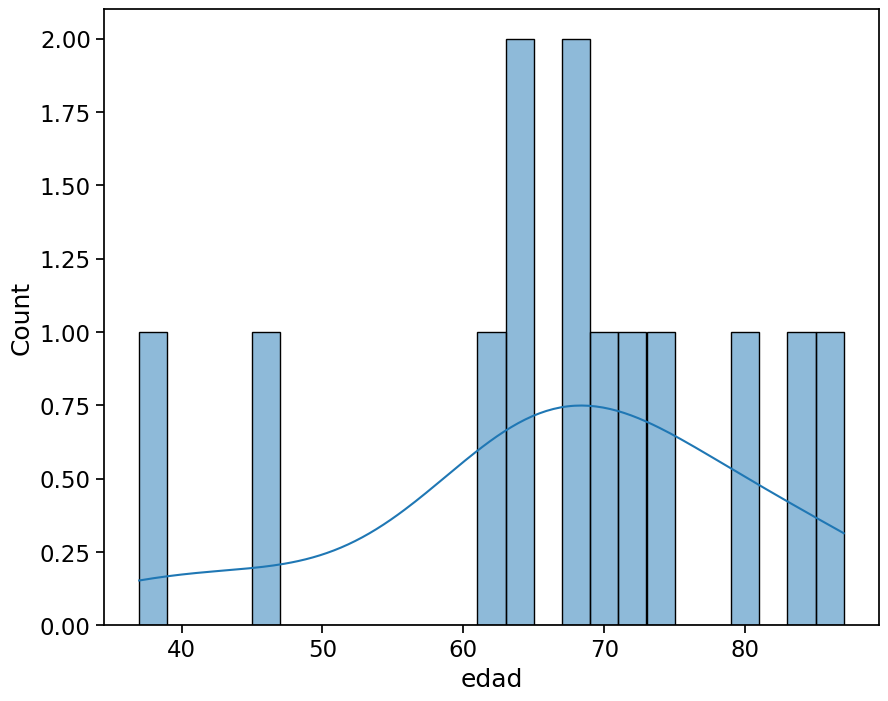

In [23]:
## Revisión de distribuciones.
#La gran mayoría de los adultos mayores se encuentran entre los 60 a 80 años
histoPlot(diagI, 'edad', 2)

<Figure size 1000x800 with 0 Axes>

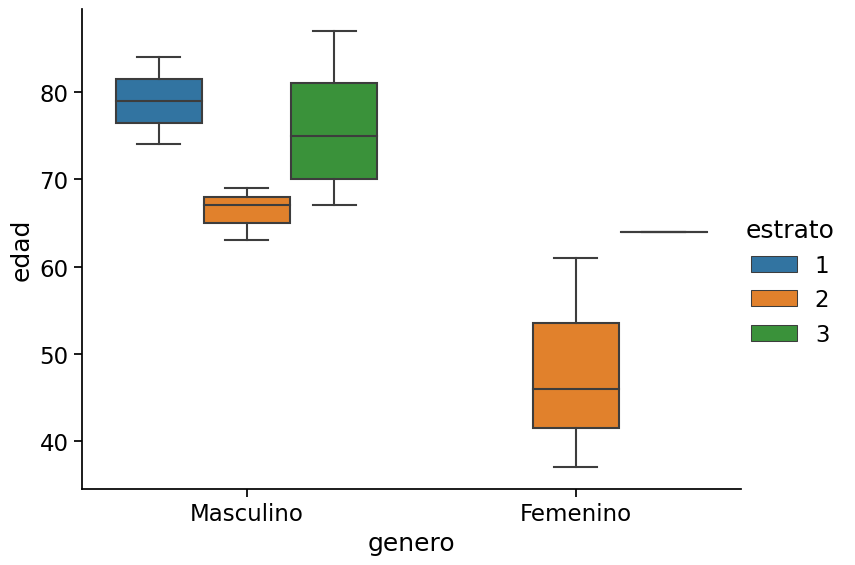

In [24]:
##Las personas con mayor distribución en la data se encuentran en el género másculino con el estrato 1,2 y 3 mientas solo en la población femenina las
#adultas mayores son del estrato 2 en su mayoria. Las medias de edades de la población femenina y masculina son diferentes.
boxPlot(diagI, 'genero', 'edad','estrato')


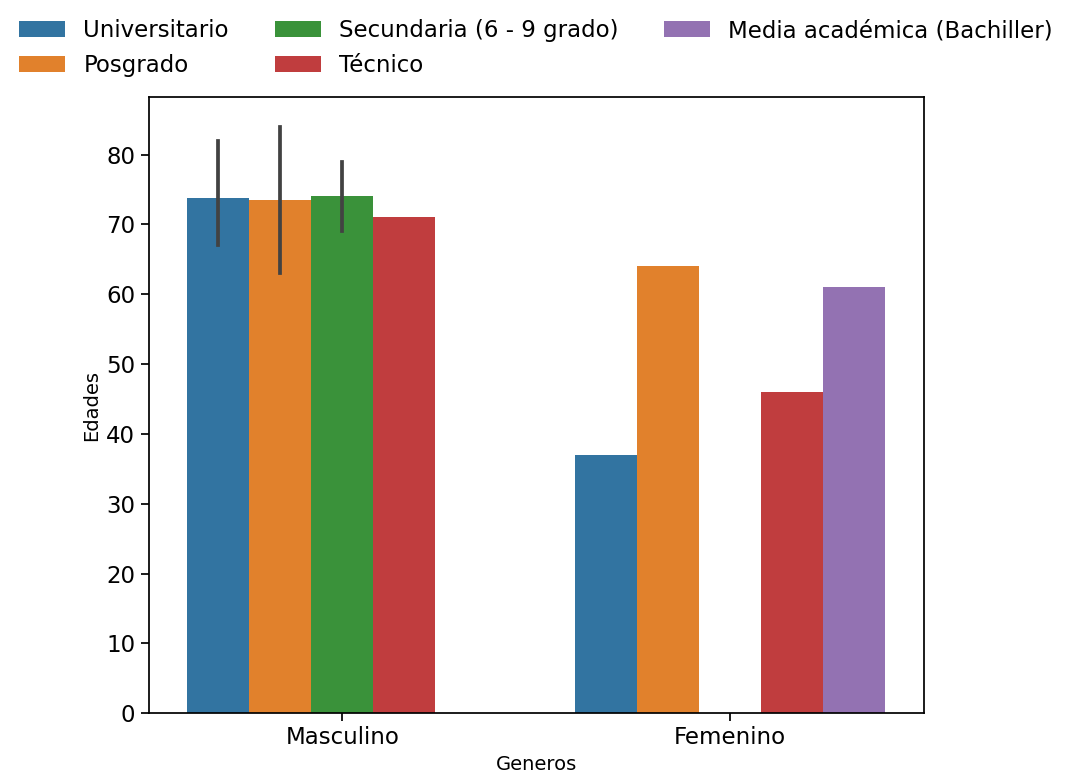

In [25]:
barPlot('genero','edad', 'nestudio',diagI, 'Edades', 'Generos')

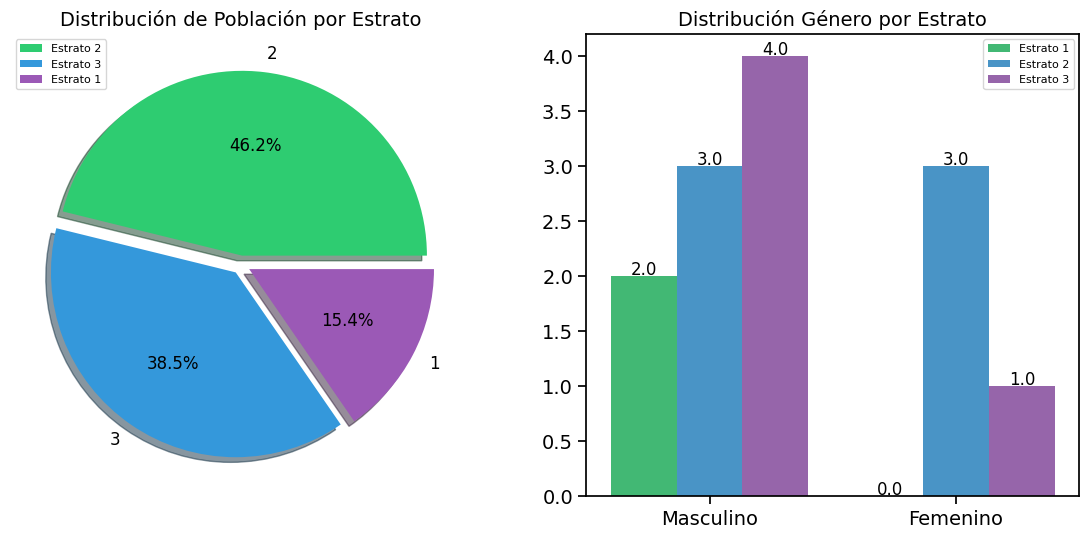

In [34]:
###Drawchart pregunta y genero
# El 46.2% de la población se encuentra en estrato 2, el 38.5% en estrato 3 y solo el 15.4% restante en estrato 1.

drawChart('genero','estrato','Distribución de Población por Estrato','Distribución Género por Estrato',(0.05, 0.05, 0.05), sizes=[14,6])

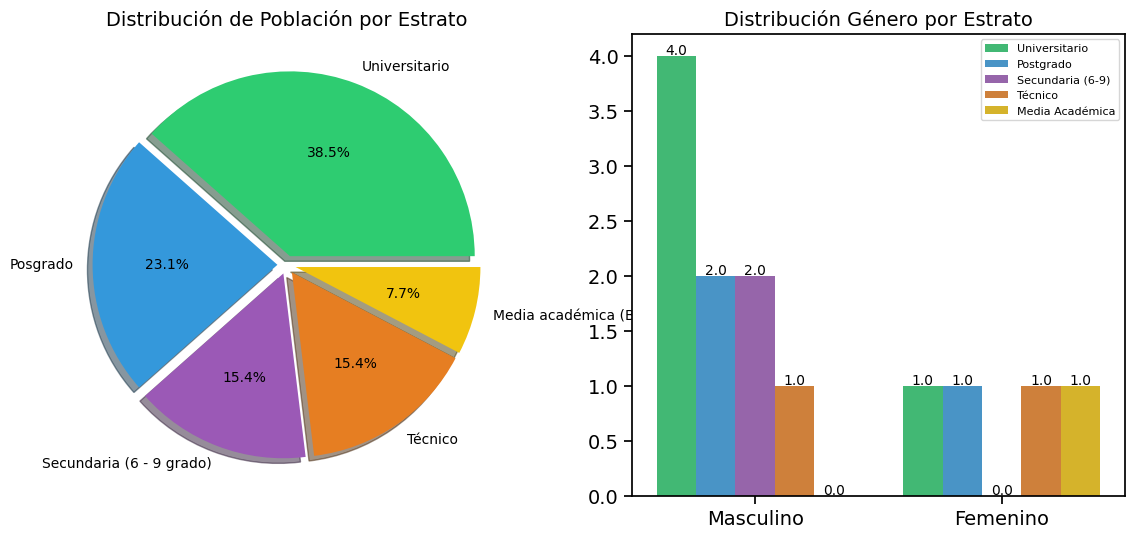

In [36]:
#El 38,5% de las personas encuestadas poseen un grado universitario, 23,1% a nivel de postgrado, 15,4% con nivel de secundaria y técnico, finalmente 7,7% con nivel de media académica
drawChartDos('genero','nestudio','Distribución de Población por Estrato','Distribución Género por Estrato',(0.05, 0.05, 0.05, 0.05, 0.05), sizes=[14,6])

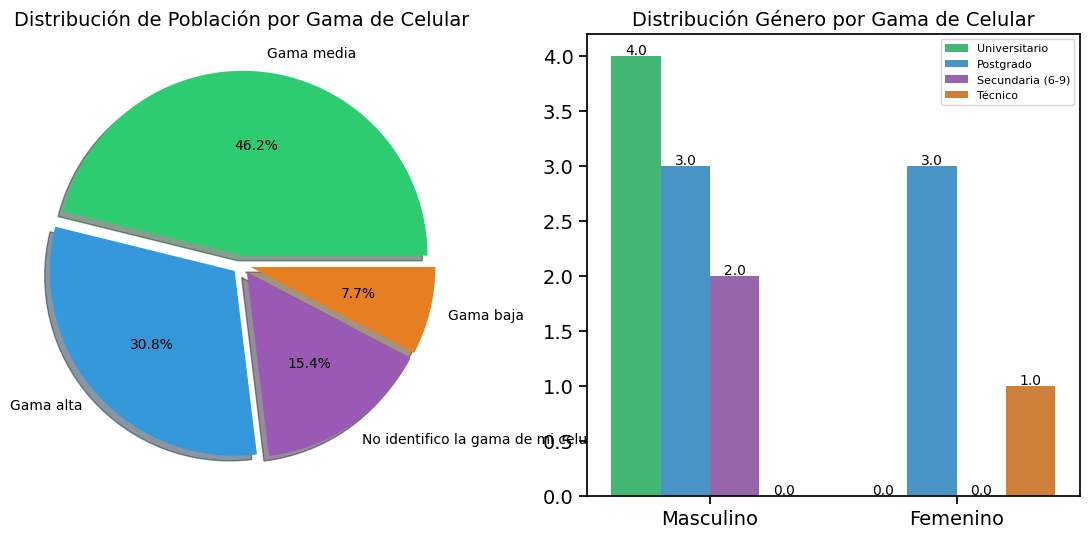

In [37]:
#El 46.2% de la población sabe identificar la gama de su celular los cuales tienen un celular gama media, 30,8% gama alta y el 15,4% no identifico la gama de su celular.
drawChartDos('genero','gamacel','Distribución de Población por Gama de Celular','Distribución Género por Gama de Celular',(0.05, 0.05, 0.05, 0.05), sizes=[14,6])

In [32]:
##medidas de tendencia central
diagI.describe().T
##Se evidencia un promedio de edad de 67 años y la gran mayoría de personas son de estrato dos. Al revisar la data contiene mucha dispersión evidencia en la edad y estrato,
#por tal motivo se procede al test de normalidad de shapiro wilk asumiendo que la hipótesis nula: muestra proviene de una población normal y la hipótesis alternativa: muestra que la data
#no proviene de una población normal.

,count,mean,std,min,25%,50%,75%,max
edad,13.0,66.846154,13.855481,37.0,63.0,67.0,74.0,87.0
estrato,13.0,2.230769,0.725011,1.0,2.0,2.0,3.0,3.0
P1,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
P2,13.0,0.230769,0.438529,0.0,0.0,0.0,0.0,1.0
P3,13.0,0.153846,0.375534,0.0,0.0,0.0,0.0,1.0
P4,13.0,0.230769,0.438529,0.0,0.0,0.0,0.0,1.0
P5,13.0,0.230769,0.438529,0.0,0.0,0.0,0.0,1.0
P6,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
P7,13.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
P8,13.0,0.769231,0.438529,0.0,1.0,1.0,1.0,1.0


In [38]:
##Antes de normalizar se realizan las variables dummies con las categorías mas grandes
diagIni = diagI
diagIni = convDummies(diagIni,'nestudio')
diagIni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   edad                         13 non-null     int64 
 1   genero                       13 non-null     object
 2   estrato                      13 non-null     int64 
 3   marcacel                     13 non-null     object
 4   gamacel                      13 non-null     object
 5   P1                           13 non-null     int64 
 6   P2                           13 non-null     int64 
 7   P3                           13 non-null     int64 
 8   P4                           13 non-null     int64 
 9   P5                           13 non-null     int64 
 10  P6                           13 non-null     int64 
 11  P7                           13 non-null     int64 
 12  P8                           13 non-null     int64 
 13  P9                           13 non-n

In [39]:
diagIni = convDummies(diagIni,'gamacel')
diagIni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   edad                                 13 non-null     int64 
 1   genero                               13 non-null     object
 2   estrato                              13 non-null     int64 
 3   marcacel                             13 non-null     object
 4   P1                                   13 non-null     int64 
 5   P2                                   13 non-null     int64 
 6   P3                                   13 non-null     int64 
 7   P4                                   13 non-null     int64 
 8   P5                                   13 non-null     int64 
 9   P6                                   13 non-null     int64 
 10  P7                                   13 non-null     int64 
 11  P8                                   13 non-nul

In [40]:
diagIni = convDummies(diagIni,'marcacel')
diagIni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   edad                                 13 non-null     int64 
 1   genero                               13 non-null     object
 2   estrato                              13 non-null     int64 
 3   P1                                   13 non-null     int64 
 4   P2                                   13 non-null     int64 
 5   P3                                   13 non-null     int64 
 6   P4                                   13 non-null     int64 
 7   P5                                   13 non-null     int64 
 8   P6                                   13 non-null     int64 
 9   P7                                   13 non-null     int64 
 10  P8                                   13 non-null     int64 
 11  P9                                   13 non-nul

In [41]:
##Convertir datos a binario y numéricos

diagI['genero']= camTextBi(diagI, 'genero','Masculino', 1, 0)
diagIni['genero']= camTextBi(diagIni, 'genero','Masculino', 1, 0)

"""
Universitario                  5
Posgrado                       3
Secundaria (6 - 9 grado)       2
Técnico                        2
Media académica (Bachiller)    1

4    5
1    3
2    2
3    2
0    1
"""
diagI['nestudio']=labelE(diagI, 'nestudio')

"""
Gama media                             6
Gama alta                              4
No identifico la gama de mi celular    2
Gama baja                              1

2    6
0    4
3    2
1    1
"""
diagI['gamacel']=labelE(diagI, 'gamacel')

"""
Samsung     4
Huawei      3
Xiaomi      2
Motorola    2
Sansung     1
Nokia       1

3    4
0    3
5    2
1    2
4    1
2    1
"""
diagI['marcacel']=labelE(diagI, 'marcacel')

revCategoricos(diagI, 'marcacel')

3    5
0    3
4    2
1    2
2    1
Name: marcacel, dtype: int64

In [42]:
##Test de normalidad para corroborar la necesidad de normalizar la data y verificar las hipótesis
##Se evidencian las variables con normalidad edad, genero, marcacel, p1, p6, p7, p9, p10 lo cual el valor p_value es mayor a 0.05 se acepta la hipótesis nula.

##No son variables normales estrato, nestudio, gamacel, p2, p3, p4, p5, p8. se rechaza la hipótesis nula y se acepta la hipótesis alternativa
dataShapiro = testShapiroWilk(diagI)

datashapiroNorm = dataShapiro[dataShapiro['Concepto'] == 'Es una variable Normal']

datashapiroNNorm = dataShapiro[dataShapiro['Concepto'] != 'Es una variable Normal']

In [43]:
##Variables normales
datashapiroNorm

,Variable,Valores P,Concepto
0,edad,0.451883,Es una variable Normal
6,P1,1.000000,Es una variable Normal
11,P6,1.000000,Es una variable Normal
12,P7,1.000000,Es una variable Normal
14,P9,1.000000,Es una variable Normal
15,P10,1.000000,Es una variable Normal


In [44]:
##Variables no normales
datashapiroNNorm

,Variable,Valores P,Concepto
1,genero,0.000056,No es una variable Normal
2,estrato,0.008703,No es una variable Normal
3,nestudio,0.035424,No es una variable Normal
4,marcacel,0.038763,No es una variable Normal
5,gamacel,0.012704,No es una variable Normal
7,P2,0.000018,No es una variable Normal
8,P3,0.000004,No es una variable Normal
9,P4,0.000018,No es una variable Normal
10,P5,0.000018,No es una variable Normal
13,P8,0.000018,No es una variable Normal


In [45]:
##Normalizar las columnas necesarias y probar con un algoritmo de predicción las variables normalizadas en su totalidad Vs las no normalizadas para revisar métricas.
dataPuno = partData(diagI,'edad','genero','estrato','nestudio','marcacel','gamacel','P2','P3','P4','P5','P8')

dataPdos = partDataDos(diagI, 'P1','P6','P7','P9','P10','Notafinal')



In [46]:
##Normalizar la data
dataM = normaData(dataPuno)

dataM.head()

,edad,genero,estrato,nestudio,marcacel,gamacel,P2,P3,P4,P5,P8
0,0.74,1.0,0.0,1.00,0.00,0.000000,1.0,1.0,0.0,0.0,1.0
1,0.52,1.0,0.5,0.25,1.00,0.666667,1.0,0.0,1.0,0.0,1.0
2,0.54,0.0,1.0,0.25,0.00,0.666667,0.0,1.0,0.0,1.0,1.0
3,0.60,1.0,1.0,1.00,0.75,1.000000,0.0,0.0,0.0,1.0,1.0
4,0.84,1.0,1.0,0.50,0.75,0.666667,0.0,0.0,1.0,0.0,0.0


In [47]:
##Unir data normalizado y data original- Data Lista con normalización sin variables dummies
dataListaN = pd.concat([dataM, dataPdos], axis=1)

dataListaN.head()

,edad,genero,estrato,nestudio,marcacel,gamacel,P2,P3,P4,P5,P8,P1,P6,P7,P9,P10,Notafinal
0,0.74,1.0,0.0,1.00,0.00,0.000000,1.0,1.0,0.0,0.0,1.0,0,0,0,0,0,3
1,0.52,1.0,0.5,0.25,1.00,0.666667,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,3
2,0.54,0.0,1.0,0.25,0.00,0.666667,0.0,1.0,0.0,1.0,1.0,0,0,0,0,0,3
3,0.60,1.0,1.0,1.00,0.75,1.000000,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,2
4,0.84,1.0,1.0,0.50,0.75,0.666667,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1


In [48]:
##Data Lista con variables dummies
dataListaD = normaData(diagIni)

dataListaD.head()

,edad,genero,estrato,P1,P2,P3,P4,P5,P6,P7,...,Universitario,Gama alta,Gama baja,Gama media,No identifico la gama de mi celular,Huawei,Motorola,Nokia,Samsung,Xiaomi
0,0.74,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.52,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.54,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.60,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.84,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
corr_matrix = dataListaN.corr(method='pearson')

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
1,edad,genero,0.743502,0.743502
12,genero,edad,0.743502,0.743502
88,P3,marcacel,-0.615387,0.615387
55,marcacel,P3,-0.615387,0.615387
139,Notafinal,P3,0.588663,0.588663
...,...,...,...,...
18,genero,P2,-0.030429,0.030429
14,genero,estrato,-0.018405,0.018405
25,estrato,genero,-0.018405,0.018405
87,P3,nestudio,-0.011772,0.011772


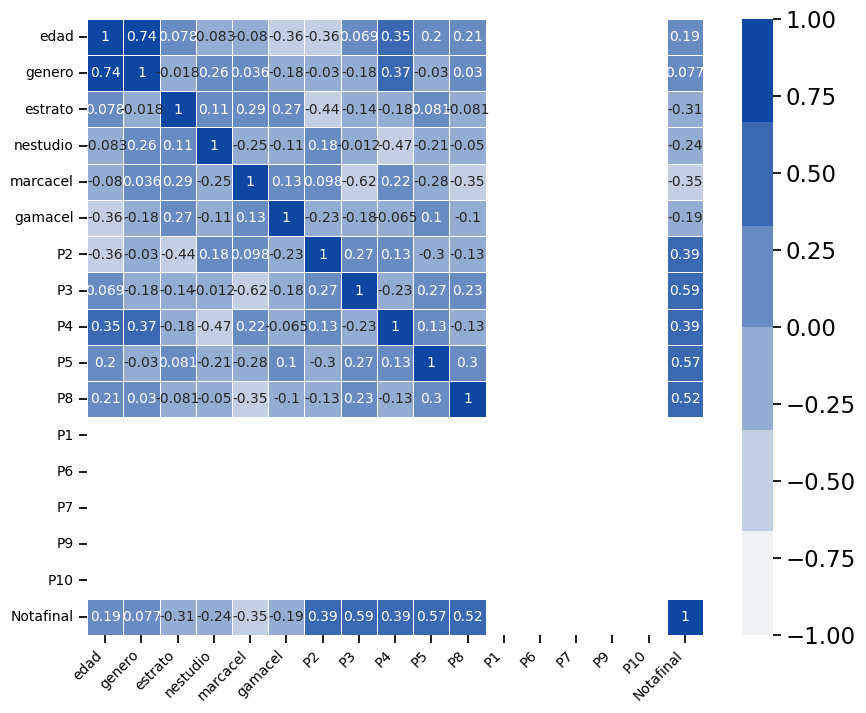

In [79]:
grafCor(corr_matrix)

In [51]:
##Eliminar las variables que no aportan a la correlación(P1, P6,P7,P9,P10)
dataListaNDos = dataListaN.drop(['P1','P6','P7','P9','P10'],axis=1)

dataListaNDos.head()

,edad,genero,estrato,nestudio,marcacel,gamacel,P2,P3,P4,P5,P8,Notafinal
0,0.74,1.0,0.0,1.00,0.00,0.000000,1.0,1.0,0.0,0.0,1.0,3
1,0.52,1.0,0.5,0.25,1.00,0.666667,1.0,0.0,1.0,0.0,1.0,3
2,0.54,0.0,1.0,0.25,0.00,0.666667,0.0,1.0,0.0,1.0,1.0,3
3,0.60,1.0,1.0,1.00,0.75,1.000000,0.0,0.0,0.0,1.0,1.0,2
4,0.84,1.0,1.0,0.50,0.75,0.666667,0.0,0.0,1.0,0.0,0.0,1


In [52]:
corr_matrixDos = dataListaNDos.corr(method='pearson')

tidy_corr_matrix(corr_matrixDos)

,variable_1,variable_2,r,abs_r
1,edad,genero,0.743502,0.743502
12,genero,edad,0.743502,0.743502
88,P3,marcacel,-0.615387,0.615387
55,marcacel,P3,-0.615387,0.615387
139,Notafinal,P3,0.588663,0.588663
...,...,...,...,...
18,genero,P2,-0.030429,0.030429
14,genero,estrato,-0.018405,0.018405
25,estrato,genero,-0.018405,0.018405
87,P3,nestudio,-0.011772,0.011772


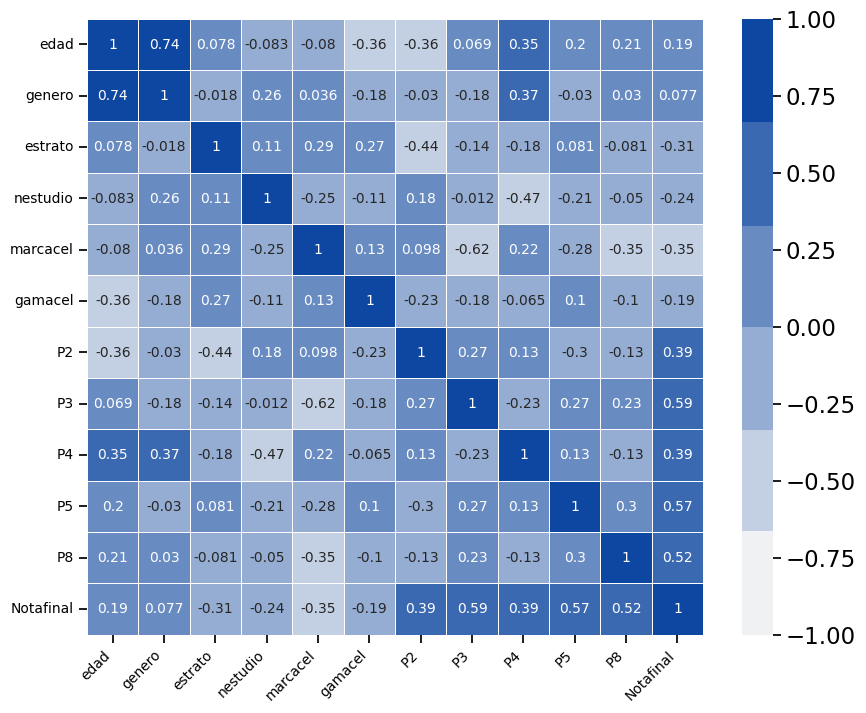

In [82]:
##Existen unas correlaciones muy positivas en el diagnóstico inicial(pretest)
#  las cuales son:
"""
NotaFinal y P2 = 0.39
NotaFinal y P3 = 0.59
NotaFinal y P4 = 0.39
NotaFinal y P5 = 0.57
NotaFinal y P8 = 0.52

Edad y Genero = 0.74

Edad y P4 =0.35
Genero y P4 = 0.37

Esto quiere decir que dichas preguntas seleccionadas son las mejores candidatas para poder predecir la nota final del adulto mayor realizando
un análisis al pretest, ahora se proceder a realizar el mismo estudio al postest con el fin de contrastar las diferencias en las variables a
la hora de predecir y determinar cual es el mejor momento para realizar predicción de nota final como elemento de verificación de la apropiación
del conocimiento en TI de los adultos mayores sumado a un análisis de pruebas-t para determinar el nivel de progreso del adulto mayor en la dinámica 
seleccionada.
"""
grafCor(corr_matrixDos)


## Paso 4: Análisis de Postest

In [83]:
diagF = importDatos('../AnalisisProyeccionSocial/','diagnostico_final','.csv',';')
diagF.head()

,edad,genero,estrato,nestudio,marcacel,gamacel,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,Notafinal
0,74,Masculino,1,Universitario,Huawei,Gama alta,1,1,1,1,1,1,1,0,1,0,8
1,63,Masculino,2,Posgrado,Xiaomi,Gama media,1,1,1,1,1,1,1,1,1,0,9
2,64,Femenino,3,Posgrado,Huawei,Gama media,1,0,1,1,1,0,1,1,1,1,8
3,67,Masculino,3,Universitario,Sansung,No identifico la gama de mi celular,0,0,1,0,1,0,1,1,1,1,6
4,79,Masculino,3,Secundaria (6 - 9 grado),Samsung,Gama media,0,0,1,1,1,0,1,1,1,1,7


In [84]:
##En una escala de 0 a 10 siendo cero la más baja y 10 la mejor
##se evidencia un incremento de 6.5 puntos en la nota promedio de los
##adultos mayores. Y se evidencia menor dispersión de los daros en
#la nota final entendiendo que se encuentra el aprendizaje más homogéneo.
diagF.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,13.0,66.846154,13.855481,37.0,63.0,67.0,74.0,87.0
estrato,13.0,2.230769,0.725011,1.0,2.0,2.0,3.0,3.0
P1,13.0,0.846154,0.375534,0.0,1.0,1.0,1.0,1.0
P2,13.0,0.769231,0.438529,0.0,1.0,1.0,1.0,1.0
P3,13.0,0.692308,0.480384,0.0,0.0,1.0,1.0,1.0
P4,13.0,0.692308,0.480384,0.0,0.0,1.0,1.0,1.0
P5,13.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
P6,13.0,0.692308,0.480384,0.0,0.0,1.0,1.0,1.0
P7,13.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
P8,13.0,0.923077,0.277350,0.0,1.0,1.0,1.0,1.0


In [85]:
##Conversión a variables dummies
diagFini = diagF
diagFini = convDummies(diagFini,'nestudio')
diagFini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   edad                         13 non-null     int64 
 1   genero                       13 non-null     object
 2   estrato                      13 non-null     int64 
 3   marcacel                     13 non-null     object
 4   gamacel                      13 non-null     object
 5   P1                           13 non-null     int64 
 6   P2                           13 non-null     int64 
 7   P3                           13 non-null     int64 
 8   P4                           13 non-null     int64 
 9   P5                           13 non-null     int64 
 10  P6                           13 non-null     int64 
 11  P7                           13 non-null     int64 
 12  P8                           13 non-null     int64 
 13  P9                           13 non-n

In [86]:
diagFini = convDummies(diagFini,'gamacel')
diagFini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   edad                                 13 non-null     int64 
 1   genero                               13 non-null     object
 2   estrato                              13 non-null     int64 
 3   marcacel                             13 non-null     object
 4   P1                                   13 non-null     int64 
 5   P2                                   13 non-null     int64 
 6   P3                                   13 non-null     int64 
 7   P4                                   13 non-null     int64 
 8   P5                                   13 non-null     int64 
 9   P6                                   13 non-null     int64 
 10  P7                                   13 non-null     int64 
 11  P8                                   13 non-nul

In [87]:
diagFini = convDummies(diagFini,'marcacel')
diagFini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   edad                                 13 non-null     int64 
 1   genero                               13 non-null     object
 2   estrato                              13 non-null     int64 
 3   P1                                   13 non-null     int64 
 4   P2                                   13 non-null     int64 
 5   P3                                   13 non-null     int64 
 6   P4                                   13 non-null     int64 
 7   P5                                   13 non-null     int64 
 8   P6                                   13 non-null     int64 
 9   P7                                   13 non-null     int64 
 10  P8                                   13 non-null     int64 
 11  P9                                   13 non-nul

In [88]:
##Convertir a Binarios
diagF['genero']= camTextBi(diagF, 'genero','Masculino', 1, 0)
diagFini['genero']= camTextBi(diagIni, 'genero','Masculino', 1, 0)
diagF['nestudio']=labelE(diagF, 'nestudio')
diagF['gamacel']=labelE(diagF, 'gamacel')
diagF['marcacel']=labelE(diagF, 'marcacel')

In [89]:
#Test de Shapiro
dataShapiroFin = testShapiroWilk(diagF)

datashapiroNormF = dataShapiroFin[dataShapiroFin['Concepto'] == 'Es una variable Normal']

datashapiroNNormF = dataShapiroFin[dataShapiroFin['Concepto'] != 'Es una variable Normal']

In [90]:
##Con respecto al diagnóstico inicial, se evidencia una reducción
#en las variables a tener en cuenta para la predicción,
#encontrando que se coincide en la edad, P7, P8, P9 pero no se
#coincide en P5, marcacel, P6 y P10. Llevando a la conclusión que 
# se debe probar los dos grups por a parte y/o
#realizar una combinación de las coincidencias.
datashapiroNormF

,Variable,Valores P,Concepto
0,edad,0.451883,Es una variable Normal
4,marcacel,0.154159,Es una variable Normal
10,P5,1.000000,Es una variable Normal
12,P7,1.000000,Es una variable Normal
14,P9,1.000000,Es una variable Normal


In [91]:
##Variables no normales Diagnostico Final
datashapiroNNormF

,Variable,Valores P,Concepto
1,genero,5.571200e-05,No es una variable Normal
2,estrato,8.702985e-03,No es una variable Normal
3,nestudio,3.542433e-02,No es una variable Normal
5,gamacel,1.270368e-02,No es una variable Normal
6,P1,4.025122e-06,No es una variable Normal
7,P2,1.837336e-05,No es una variable Normal
8,P3,5.571200e-05,No es una variable Normal
9,P4,5.571200e-05,No es una variable Normal
11,P6,5.571200e-05,No es una variable Normal
13,P8,5.044612e-07,No es una variable Normal


In [92]:
##Normalizar las columnas necesarias en diagnostico Final o postest.
dataPunoF = partData(diagF,'genero','estrato','nestudio','gamacel','P1','P2','P3','P4','P6','P8','P10')

dataPdosF = partDataDos(diagF, 'edad','marcacel','P5','P7','P9','Notafinal')

In [93]:
##Normalizar la data postest
dataMF = normaData(dataPunoF)

dataMF.head()

,genero,estrato,nestudio,gamacel,P1,P2,P3,P4,P6,P8,P10
0,1.0,0.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.5,0.25,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.25,0.666667,1.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.0,1.0,1.00,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1.0,1.0,0.50,0.666667,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [94]:
##Unir data normalizado y data original- Data Lista con normalización sin variables dummies
dataListaNF = pd.concat([dataMF, dataPdosF], axis=1)

dataListaNF.head()

,genero,estrato,nestudio,gamacel,P1,P2,P3,P4,P6,P8,P10,edad,marcacel,P5,P7,P9,Notafinal
0,1.0,0.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,74,0,1,1,1,8
1,1.0,0.5,0.25,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,63,5,1,1,1,9
2,0.0,1.0,0.25,0.666667,1.0,0.0,1.0,1.0,0.0,1.0,1.0,64,0,1,1,1,8
3,1.0,1.0,1.00,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,67,4,1,1,1,6
4,1.0,1.0,0.50,0.666667,0.0,0.0,1.0,1.0,0.0,1.0,1.0,79,3,1,1,1,7


In [95]:
##Data Lista con variables dummies
dataListaDF = normaData(diagFini)

dataListaDF.head()

,edad,genero,estrato,P1,P2,P3,P4,P5,P6,P7,...,Gama alta,Gama baja,Gama media,No identifico la gama de mi celular,Huawei,Motorola,Nokia,Samsung,Sansung,Xiaomi
0,0.74,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.52,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.54,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.84,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [96]:
corr_matrix = dataListaNF.corr(method='pearson')

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
117,P6,P2,0.821584,0.821584
78,P2,P6,0.821584,0.821584
186,Notafinal,P1,0.816717,0.816717
69,P1,Notafinal,0.816717,0.816717
74,P2,P1,0.778499,0.778499
...,...,...,...,...
1,genero,estrato,-0.018405,0.018405
178,marcacel,P10,-0.013746,0.013746
152,P10,marcacel,-0.013746,0.013746
82,P2,marcacel,-0.008133,0.008133


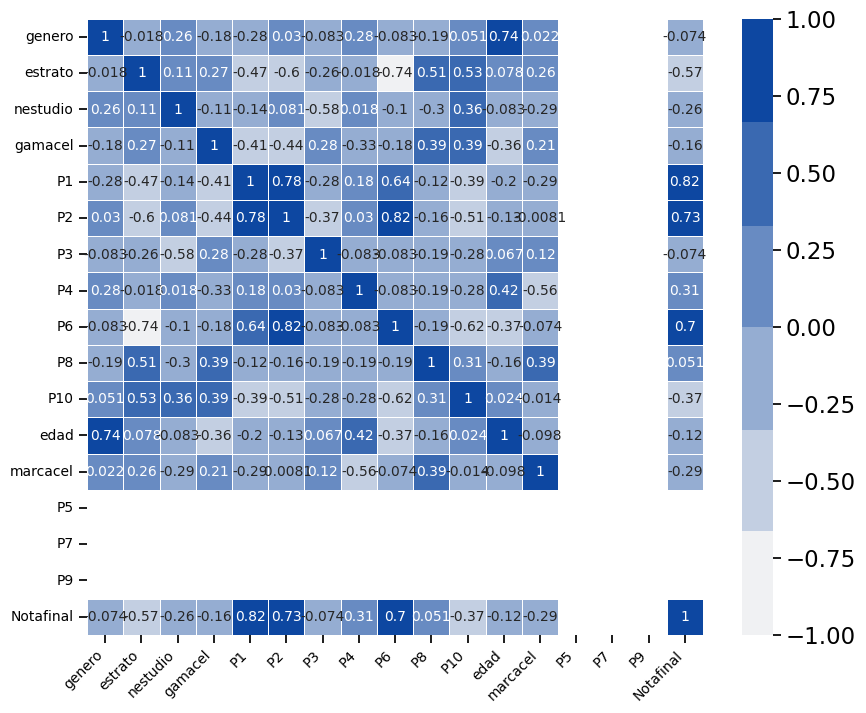

In [97]:
grafCor(corr_matrix)

In [98]:
##Eliminar las variables que no aportan a la correlación(P1, P6,P7,P9,P10)
dataListaNDosF = dataListaNF.drop(['P5','P7','P9'],axis=1)

dataListaNDosF.head()

,genero,estrato,nestudio,gamacel,P1,P2,P3,P4,P6,P8,P10,edad,marcacel,Notafinal
0,1.0,0.0,1.00,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,74,0,8
1,1.0,0.5,0.25,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0,63,5,9
2,0.0,1.0,0.25,0.666667,1.0,0.0,1.0,1.0,0.0,1.0,1.0,64,0,8
3,1.0,1.0,1.00,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,67,4,6
4,1.0,1.0,0.50,0.666667,0.0,0.0,1.0,1.0,0.0,1.0,1.0,79,3,7


In [99]:
corr_matrixDos = dataListaNDosF.corr(method='pearson')

tidy_corr_matrix(corr_matrixDos)

,variable_1,variable_2,r,abs_r
117,P6,P2,0.821584,0.821584
78,P2,P6,0.821584,0.821584
186,Notafinal,P1,0.816717,0.816717
69,P1,Notafinal,0.816717,0.816717
74,P2,P1,0.778499,0.778499
...,...,...,...,...
1,genero,estrato,-0.018405,0.018405
178,marcacel,P10,-0.013746,0.013746
152,P10,marcacel,-0.013746,0.013746
82,P2,marcacel,-0.008133,0.008133


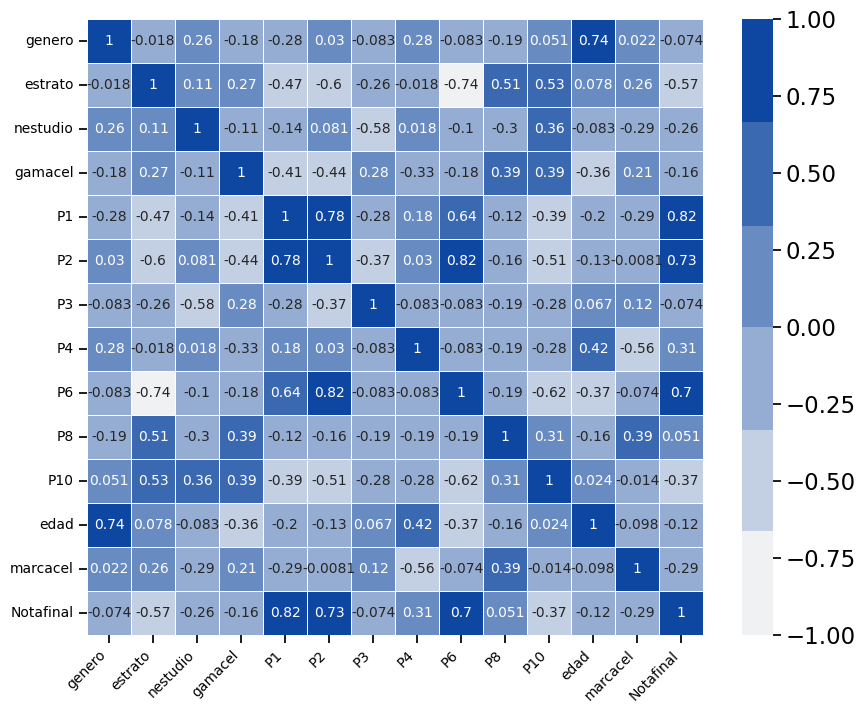

In [100]:
##Existen unas correlaciones muy positivas en el diagnóstico final(postest)
#  las cuales son:
"""
Se mantiene Edad y Genero = 0.74
NotaFinal y P1 = 0.82
NotaFinal y P2 = 0.73
NotaFinal y P6 = 0.7

P10 Y estrato= 0.53
P8 Y estrato= 0.51

P6 Y P2= 0.82
P2 Y P1= 0.78
P1 y P6 = 0.64

Las coincidencias de ambas correlaciones se dan en las variables
sin correlación como son: 'marcacel','gamacel','P8','P3','nestudio','P10','P4','estrato','genero','edad'
por otro lado se evidencia el progreso de los adultos mayores debido
a nuevas correlaciones entre las mismas preguntas.

Se procede a eliminar las variables que por su no correlación
no son eficientes para el proceso.

"""
grafCor(corr_matrixDos)

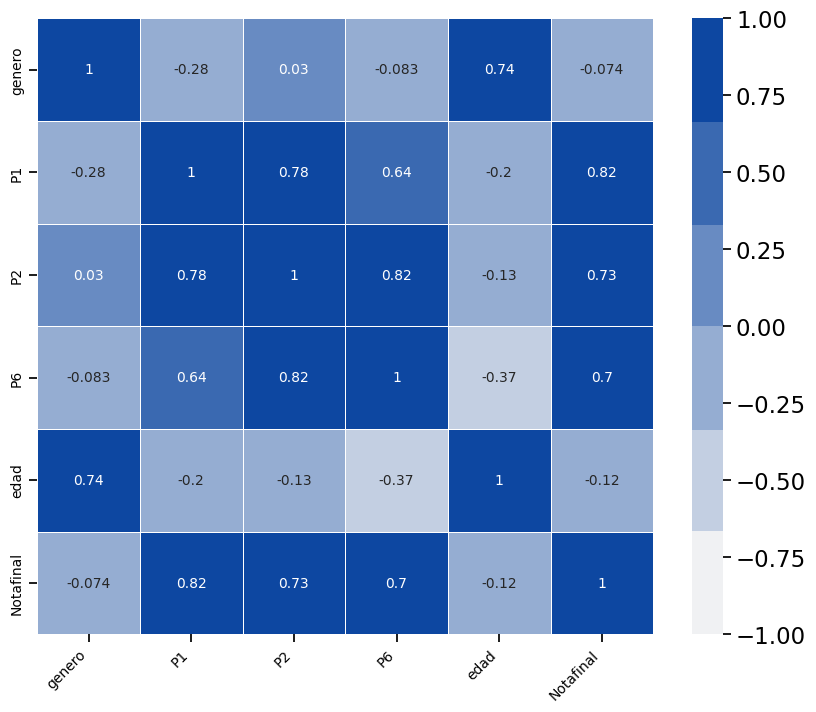

In [108]:
dataListaNTresF = dataListaNDosF.drop(['marcacel','gamacel','P8','P3','nestudio','P10','P4','estrato'], axis=1)
corr_matrixTres = dataListaNTresF.corr(method='pearson')

grafCor(corr_matrixTres)

##Como conclusión de este análisis se escogen las preguntas P1,P2, P6, genero y edad
##para poder predecir la nota final del adulto mayor, 
# se resalta la mejora de las correlaciones ya que paso de 0.52 a 0.82 
# en promedio.